In [83]:
%load_ext autoreload
%autoreload 1
%aimport game

import game
import time
import random

game._build_row_tables()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [84]:
def noskill(bs, action_space):
    return random.choice(action_space)(bs)

In [79]:
max_iters = 1000000
num_games = 10000

game_results = []

for game_index in range(num_games):
    start_board = [
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
    ]
    bs = game.to_bitset(start_board)

    start_iter = time.time()

    for i in range(max_iters):
        bs = game.generate_tile(bs)
        action_space = game.get_action_space(bs)
        if action_space:
            bs = noskill(bs, action_space)
        else:
            break
        
    time_taken = time.time() - start_iter
    game_results.append({
        'num_turns_taken': i,
        'max_tile_reached': game.get_max_tile(bs),
        'time_taken': time_taken,
    })


In [80]:
print(f'Number of games played: {num_games}')
print(f'Total time taken: {sum(result["time_taken"] for result in game_results)} seconds')
print(f'Games per second: {num_games / sum(result["time_taken"] for result in game_results)}')

print()
print(f'Max number of turns before game over: {max(result["num_turns_taken"] for result in game_results)}')
print(f'Min number of turns before game over: {min(result["num_turns_taken"] for result in game_results)}')
print(f'Average number of turns before game over: {sum(result["num_turns_taken"] for result in game_results) / len(game_results)}')

print()
print(f'Max tile reached: {max(result["max_tile_reached"] for result in game_results)}')
print(f'Min tile reached: {min(result["max_tile_reached"] for result in game_results)}')
print(f'Average max tile reached: {sum(result["max_tile_reached"] for result in game_results) / len(game_results)}')



Number of games played: 10000
Total time taken: 25.409925937652588 seconds
Games per second: 393.546995159948

Max number of turns before game over: 341
Min number of turns before game over: 34
Average number of turns before game over: 116.9824

Max tile reached: 512
Min tile reached: 16
Average max tile reached: 104.4992


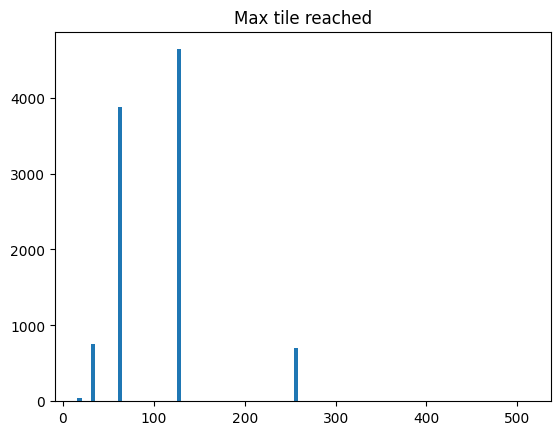

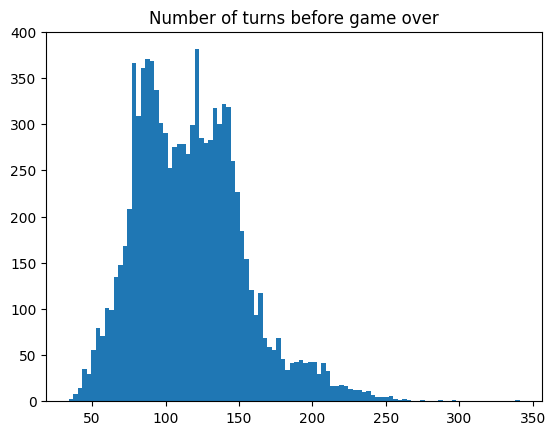

In [82]:
import pandas as pd
df = pd.DataFrame(game_results)

import matplotlib.pyplot as plt
plt.hist(df['max_tile_reached'], bins=100)
plt.title('Max tile reached')
plt.show()

plt.hist(df['num_turns_taken'], bins=100)
plt.title('Number of turns before game over')
plt.show()